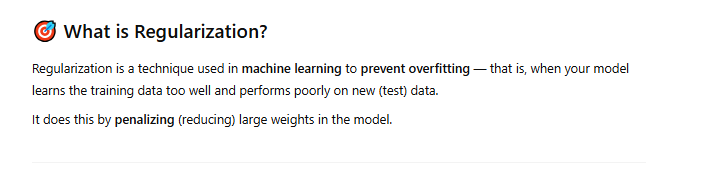
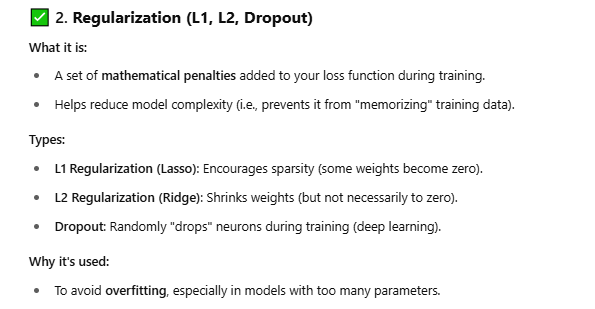
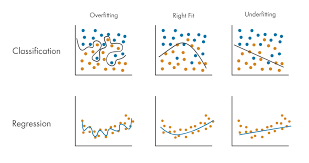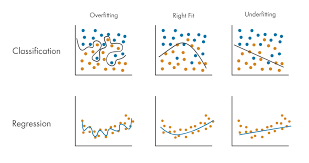

🤔 What is Underfitting in Simple Words?
Underfitting happens when a machine learning model is too simple to capture the patterns in the data — it performs poorly on both training and test data.
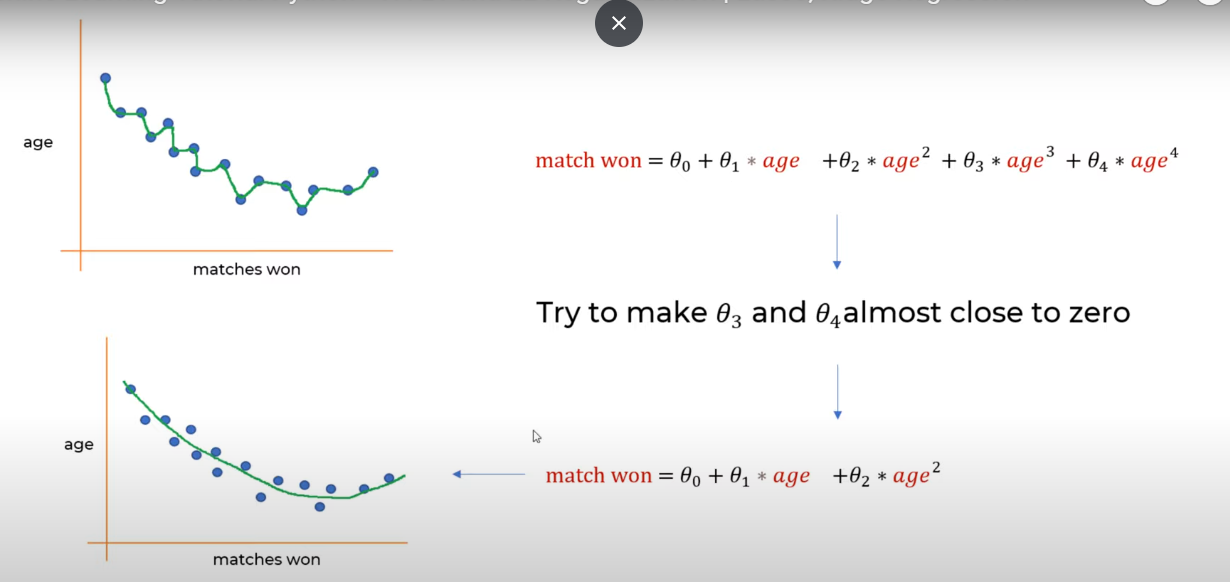

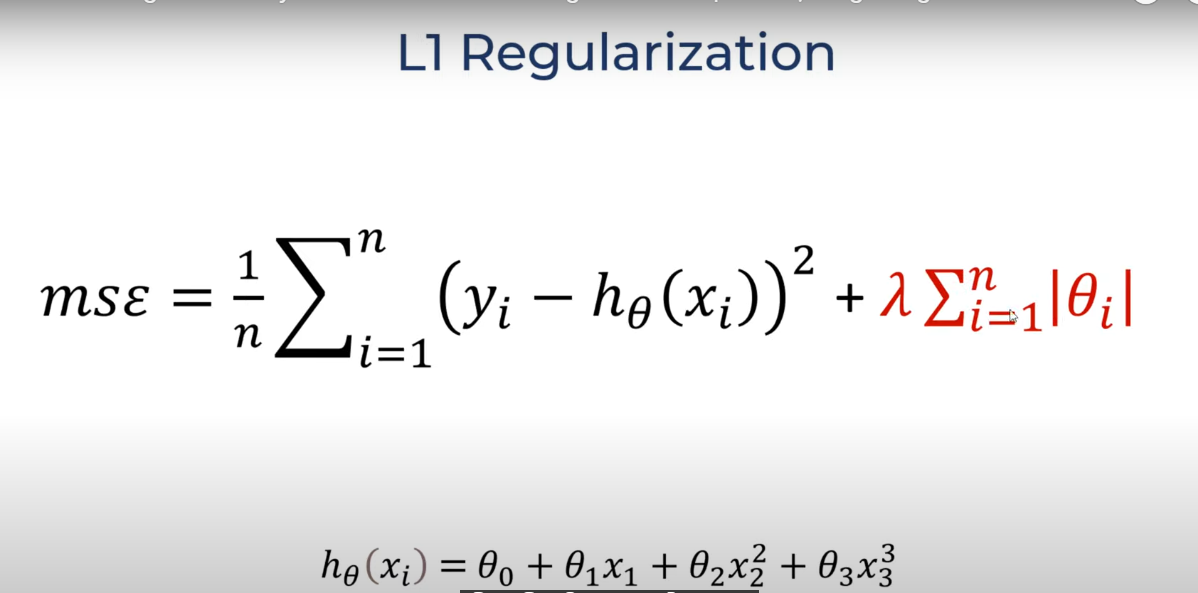
L1 Regularization (Lasso)
Adds the absolute value of weights to the loss function.
Pushes some weights to zero — so it helps in feature selection (removes unnecessary features).

Useful when you think only a few features are important.
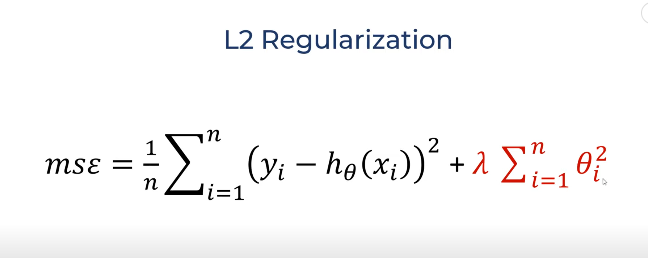
  L2 Regularization (Ridge)
Adds the squared value of weights to the loss function.
Reduces weights smoothly (but not to zero).

Keeps all features, but shrinks their impact if not important.

Useful when you think most features are relevant but need to be balanced.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [5]:
df[df.columns[df.isna().any()]]


Price  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0            NaN       2.5    3067.0       2.0       1.0  1.0     126.0   
1      1480000.0       2.5    3067.0       2.0       1.0  1.0     202.0   
2      1035000.0       2.5    3067.0       2.0       1.0  0.0     156.0   
3            NaN       2.5    3067.0       3.0       2.0  1.0       0.0   
4      1465000.0       2.5    3067.0       3.0       2.0  0.0     134.0   
...          ...       ...       ...       ...       ...  ...       ...   
34852  1480000.0       6.3    3013.0       4.0       1.0  3.0     593.0   
34853   888000.0       6.3    3013.0       2.0       2.0  1.0      98.0   
34854   705000.0       6.3    3013.0       2.0       1.0  2.0     220.0   
34855  1140000.0       6.3    3013.0       NaN       NaN  NaN       NaN   
34856  1020000.0       6.3    3013.0       2.0       1.0  0.0     250.0   

       BuildingArea  YearBuilt               CouncilArea  Lattitude  \
0               NaN        NaN        Yarra City Council  -37.80140   
1               NaN        NaN        Yarra City Council  -37.79960   
2              79.0     1900.0        Yarra City Council  -37.80790   
3               NaN        NaN        Yarra City Council  -37.81140   
4             150.0     1900.0        Yarra City Council  -37.80930   
...             ...        ...                       ...        ...   
34852           NaN        NaN  Maribyrnong City Council  -37.81053   
34853         104.0     2018.0  Maribyrnong City Council  -37.81551   
34854         120.0     2000.0  Maribyrnong City Council  -37.82286   
34855           NaN        NaN  Maribyrnong City Council        NaN   
34856         103.0     1930.0  Maribyrnong City Council  -37.81810   

       Longtitude             Regionname  Propertycount  
0       144.99580  Northern Metropolitan         4019.0  
1       144.99840  Northern Metropolitan         4019.0  
2       144.99340  Northern Metropolitan         4019.0  
3       145.01160  Northern Metropolitan         4019.0  
4       144.99440  Northern Metropolitan         4019.0  
...           ...                    ...            ...  
34852   144.88467   Western Metropolitan         6543.0  
34853   144.88826   Western Metropolitan         6543.0  
34854   144.87856   Western Metropolitan         6543.0  
34855         NaN   Western Metropolitan         6543.0  
34856   144.89351   Western Metropolitan         6543.0  

[34857 rows x 14 columns]

In [6]:
df.shape

(34857, 21)

In [8]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [9]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df = df[cols_to_use]

In [10]:
df.head()

Suburb  Rooms Type Method SellerG             Regionname  \
0  Abbotsford      2    h     SS  Jellis  Northern Metropolitan   
1  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
2  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
3  Abbotsford      3    u     VB  Rounds  Northern Metropolitan   
4  Abbotsford      3    h     SP  Biggin  Northern Metropolitan   

   Propertycount  Distance         CouncilArea  Bedroom2  Bathroom  Car  \
0         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
1         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
2         4019.0       2.5  Yarra City Council       2.0       1.0  0.0   
3         4019.0       2.5  Yarra City Council       3.0       2.0  1.0   
4         4019.0       2.5  Yarra City Council       3.0       2.0  0.0   

   Landsize  BuildingArea      Price  
0     126.0           NaN        NaN  
1     202.0           NaN  1480000.0  
2     156.0          79.0  1035000.0  
3       0.0           NaN        NaN  
4     134.0         150.0  1465000.0

In [11]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [16]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)
df

C:\Users\atulm\AppData\Local\Temp\ipykernel_9496\2325207857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)


Suburb  Rooms Type Method        SellerG             Regionname  \
0      Abbotsford      2    h     SS         Jellis  Northern Metropolitan   
1      Abbotsford      2    h      S         Biggin  Northern Metropolitan   
2      Abbotsford      2    h      S         Biggin  Northern Metropolitan   
3      Abbotsford      3    u     VB         Rounds  Northern Metropolitan   
4      Abbotsford      3    h     SP         Biggin  Northern Metropolitan   
...           ...    ...  ...    ...            ...                    ...   
34852  Yarraville      4    h     PI            Jas   Western Metropolitan   
34853  Yarraville      2    h     SP        Sweeney   Western Metropolitan   
34854  Yarraville      2    t      S            Jas   Western Metropolitan   
34855  Yarraville      3    h     SP  hockingstuart   Western Metropolitan   
34856  Yarraville      2    h     PI             RW   Western Metropolitan   

       Propertycount  Distance               CouncilArea  Bedroom2  Bathroom  \
0             4019.0       2.5        Yarra City Council       2.0       1.0   
1             4019.0       2.5        Yarra City Council       2.0       1.0   
2             4019.0       2.5        Yarra City Council       2.0       1.0   
3             4019.0       2.5        Yarra City Council       3.0       2.0   
4             4019.0       2.5        Yarra City Council       3.0       2.0   
...              ...       ...                       ...       ...       ...   
34852         6543.0       6.3  Maribyrnong City Council       4.0       1.0   
34853         6543.0       6.3  Maribyrnong City Council       2.0       2.0   
34854         6543.0       6.3  Maribyrnong City Council       2.0       1.0   
34855         6543.0       6.3  Maribyrnong City Council       0.0       0.0   
34856         6543.0       6.3  Maribyrnong City Council       2.0       1.0   

       Car  Landsize  BuildingArea      Price  
0      1.0     126.0           NaN        NaN  
1      1.0     202.0           NaN  1480000.0  
2      0.0     156.0          79.0  1035000.0  
3      1.0       0.0           NaN        NaN  
4      0.0     134.0         150.0  1465000.0  
...    ...       ...           ...        ...  
34852  3.0     593.0           NaN  1480000.0  
34853  1.0      98.0         104.0   888000.0  
34854  2.0     220.0         120.0   705000.0  
34855  0.0       NaN           NaN  1140000.0  
34856  0.0     250.0         103.0  1020000.0  

[34857 rows x 15 columns]

In [17]:
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

C:\Users\atulm\AppData\Local\Temp\ipykernel_9496\4119594487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
C:\Users\atulm\AppData\Local\Temp\ipykernel_9496\4119594487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())


In [18]:
df.isna().sum()


Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isna().sum()

C:\Users\atulm\AppData\Local\Temp\ipykernel_9496\3486782518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

one hot encode the categorical features

In [21]:
df = pd.get_dummies(df, drop_first=True) #no text column now
df

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
1          2         4019.0       2.5       2.0       1.0  1.0  202.000000   
2          2         4019.0       2.5       2.0       1.0  0.0  156.000000   
4          3         4019.0       2.5       3.0       2.0  0.0  134.000000   
5          3         4019.0       2.5       3.0       2.0  1.0   94.000000   
6          4         4019.0       2.5       3.0       1.0  2.0  120.000000   
...      ...            ...       ...       ...       ...  ...         ...   
34852      4         6543.0       6.3       4.0       1.0  3.0  593.000000   
34853      2         6543.0       6.3       2.0       2.0  1.0   98.000000   
34854      2         6543.0       6.3       2.0       1.0  2.0  220.000000   
34855      3         6543.0       6.3       0.0       0.0  0.0  593.598993   
34856      2         6543.0       6.3       2.0       1.0  0.0  250.000000   

       BuildingArea      Price  Suburb_Aberfeldie  ...  \
1          160.2564  1480000.0              False  ...   
2           79.0000  1035000.0              False  ...   
4          150.0000  1465000.0              False  ...   
5          160.2564   850000.0              False  ...   
6          142.0000  1600000.0              False  ...   
...             ...        ...                ...  ...   
34852      160.2564  1480000.0              False  ...   
34853      104.0000   888000.0              False  ...   
34854      120.0000   705000.0              False  ...   
34855      160.2564  1140000.0              False  ...   
34856      103.0000  1020000.0              False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                    False                              False   
2                                    False                              False   
4                                    False                              False   
5                                    False                              False   
6                                    False                              False   
...                                    ...                                ...   
34852                                False                              False   
34853                                False                              False   
34854                                False                              False   
34855                                False                              False   
34856                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
1                                    False   
2                                    False   
4                                    False   
5                                    False   
6                                    False   
...                                    ...   
34852                                False   
34853                                False   
34854                                False   
34855                                False   
34856                                False   

       CouncilArea_Port Phillip City Council  \
1                                      False   
2                                      False   
4                                      False   
5                                      False   
6                                      False   
...                                      ...   
34852                                  False   
34853                                  False   
34854                                  False   
34855                                  False   
34856                                  False   

       CouncilArea_Stonnington City Council  \
1                                     False   
2                                     False   
4                                     False   
5                                     False   
6                                  

In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [26]:
reg.score(test_X, test_y)

0.13853683161504515

In [27]:
reg.score(train_X, train_y) #overfit for training sampel good accuaray but the data sample that it has not seen before give very low accuaracy

0.6827792395792723

Normal Regression is clearly overfitting the data, let's try other models
Using Lasso (L1 Regularized) Regression Model

In [28]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

C:\Users\atulm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [29]:
lasso_reg.score(test_X, test_y)

0.6636111369404489

In [30]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

 (L2 Regularized) Regression Model

In [31]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [32]:
ridge_reg.score(test_X, test_y)

0.6670848945194958

In [33]:
ridge_reg.score(train_X, train_y)

0.6622376739684328